In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg

from src import paths, plotting,correlations

plt.style.use('ggplot')

!date -I

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-05-20


# Compare correlations from F-Tract and TMS-EEG

Load results from [01_f-tract/02_analysis_per_roi.ipynb](../01_f-tract/02_analysis_per_roi.ipynb) and [02_pytepfit/05_analysis.ipynb](../02_pytepfit/05_analysis.ipynb) and compare the correlation of resposnse characteristic (probability in F-Tract and binarized response, AUC and first peak latency in TMS-EEG) with structural connectivity and communication metrics. Our goal is application of the approach by [Seguin et al.](https://doi.org/10.1016/j.neuron.2023.01.027) used in F-Tract to TMS-EEG and investigation if the TMS-EEG response also correlates with the communication metrics calculated on structural connectome.

### Settings

- `ONLY_LEFT_HEMISPHERE` If True, only regions in left hemisphere (the stimulation in TMS-EEG was performed in left hemisphere) are included in the analysis.
- `FTRACT_SELECTED_ROI` According to [XX_centroids_and_parcellations/DICE_02_glasser-schaefer200_maxdice.ipynb)](../XX_centroids_and_parcellations/DICE_02_glasser-schaefer200_maxdice.ipynb), the right Glasser ROI corresponding to `7Networks_LH_SomMot_9` Schaefer ROI where the TMS stimulation was performed (see [02_pytepfit/02_stimulation-site-extraction.ipynb](../02_pytepfit/02_stimulation-site-extraction.ipynb)) is ROI `1` in left hemisphere. However, there are much more measurements in ROI `3b` in left hemisphere in F-Tract and these ROIs are really close to each other, `7Networks_LH_SomMot_9` has high Dice score with `3b` as well. Because of that, we tried both options.
- `RESPONSE_LENGTH_MS_50_OR_200` Short or long responses. Use only 50 or 200 ms, because other lengths are not available in F-Tract.

In [13]:
ONLY_LEFT_HEMISPHERE = False
FTRACT_SELECTED_ROI = "3b" # "1"

RESPONSE_LENGTH_MS_50_OR_200 = 200

In [14]:
fig_dir = f"tmseeg_ftract_comparison_results/{RESPONSE_LENGTH_MS_50_OR_200}ms/{'only_left/' if ONLY_LEFT_HEMISPHERE else ''}"
%mkdir -p  {paths.path_figures(fig_dir)}

## Load data

Load responses from [01_f-tract/02_analysis_per_roi.ipynb](../01_f-tract/02_analysis_per_roi.ipynb) and [02_pytepfit/05_analysis.ipynb](../02_pytepfit/05_analysis.ipynb).

In [15]:
ftract_length = 'long'
if RESPONSE_LENGTH_MS_50_OR_200 ==50:
    ftract_length = 'short'

ftract_probabilities = pd.read_csv(paths.path(f'interim/L_{FTRACT_SELECTED_ROI}_response_probability_and_communication_metrics_M1_FTRACT_ED0_{ftract_length}.csv')).set_index('label')
ftract_probabilities

,response,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF
label,,,,,,,,,,,
L_V1,NaN,86.130607,0.0,inf,0.009180,0.004199,0.000142,inf,18.968501,0.005998,0.002778
L_V6,NaN,66.905377,0.0,inf,0.009451,0.005002,0.000193,inf,14.131162,0.008234,0.001962
L_V2,NaN,81.759962,0.0,inf,0.009236,0.004157,0.000104,inf,18.859902,0.006358,0.002463
L_V3,NaN,81.100872,0.0,inf,0.008173,0.004355,0.000131,inf,14.547486,0.007004,0.002766
L_V4,NaN,82.487126,0.0,inf,0.008430,0.004579,0.000099,inf,21.530236,0.007316,0.002854
...,...,...,...,...,...,...,...,...,...,...,...
R_FOP2,NaN,90.352537,0.0,inf,0.007381,0.005861,0.000228,inf,22.657491,0.006939,0.001658
R_PoI1,NaN,95.853057,0.0,inf,0.007615,0.004942,0.000635,inf,15.317664,0.006197,0.002664
R_Ig,NaN,83.897695,0.0,inf,0.007489,0.005057,0.000240,inf,21.995380,0.006711,0.001151


In [16]:
pytepfit_01 = pd.read_csv(paths.path(f'interim/pyTepFit_empirical/not_over_threshold_nan/response_01_and_communication_metrics_M1_pyTepFit_{RESPONSE_LENGTH_MS_50_OR_200}ms_thr8.csv')).set_index('label')
pytepfit_01.index = pytepfit_01.index.map(lambda x: x[:-3])
pytepfit_01

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,0
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,1
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,1
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,1
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,0
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,0
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,0
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,0


In [17]:
pytepfit_AUC = pd.read_csv(paths.path(f'interim/pyTepFit_empirical/not_over_threshold_nan/response_AUC_and_communication_metrics_M1_pyTepFit_{RESPONSE_LENGTH_MS_50_OR_200}ms_thr8.csv')).set_index('label')
pytepfit_AUC.index = pytepfit_AUC.index.map(lambda x: x[:-3])
pytepfit_AUC

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,NaN
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,3429.233902
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,899.571678
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,795.702728
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,NaN
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,NaN
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,NaN


In [18]:
pytepfit_FP = pd.read_csv(paths.path(f'interim/pyTepFit_empirical/not_over_threshold_nan/response_FP_and_communication_metrics_M1_pyTepFit_{RESPONSE_LENGTH_MS_50_OR_200}ms_thr8.csv')).set_index('label')
pytepfit_FP.index = pytepfit_FP.index.map(lambda x: x[:-3])
pytepfit_FP

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,NaN
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,30.0
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,114.0
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,109.0
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,NaN
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,NaN
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,NaN


In [19]:
dict_response_metrics = {"F-Tract":ftract_probabilities,"TMS-EEG_AUC":pytepfit_AUC,"TMS-EEG_FPL":pytepfit_FP,"TMS-EEG_01":pytepfit_01}

In [20]:
if ONLY_LEFT_HEMISPHERE:
    for df_name in dict_response_metrics:
        dict_response_metrics[df_name] = dict_response_metrics[df_name].head(len(dict_response_metrics[df_name])//2).copy()

## Plot the results

Calculate the correlation of responses with structural connectivity and communication metrics and plot the results.

In [21]:
stat_all = {}
stat_all_partial = {}

for name in dict_response_metrics:
    df = dict_response_metrics[name]
    stat_all[name] = pg.pairwise_corr(df,'response', method='spearman').round(3)
    stat_all_partial[name] = correlations.partial_corr_ED(df,'response', method='spearman').round(3)

df_stat_all = pd.concat(stat_all).reset_index(names=["dataset",'--'])
df_stat_all_partial = pd.concat(stat_all_partial).reset_index(names=["dataset",'--'])

for df in [df_stat_all,df_stat_all_partial]:
    correlations.abs_r_to_dataframe(df)
    correlations.sigf_sign_to_dataframe(df)

df_stat_all_partial

,dataset,--,n,r,CI95%,p-val,Y,r_abs,p_sigf
0,F-Tract,0,0,0.000,None,1.000,ED,0.000,
1,F-Tract,spearman,78,0.364,"[0.15, 0.54]",0.001,SC_W,0.364,*
2,F-Tract,spearman,78,-0.422,"[-0.59, -0.22]",0.000,SC_L,0.422,*
3,F-Tract,spearman,78,0.503,"[0.31, 0.65]",0.000,SPE,0.503,*
4,F-Tract,spearman,78,0.293,"[0.07, 0.49]",0.010,SPE_W,0.293,*
5,F-Tract,spearman,78,0.448,"[0.25, 0.61]",0.000,COM,0.448,*
6,F-Tract,spearman,78,-0.364,"[-0.54, -0.15]",0.001,SI,0.364,*
7,F-Tract,spearman,78,-0.175,"[-0.38, 0.05]",0.128,SI_L,0.175,
8,F-Tract,spearman,78,0.436,"[0.24, 0.6]",0.000,NAV,0.436,*
9,F-Tract,spearman,78,-0.085,"[-0.3, 0.14]",0.463,DIF,0.085,


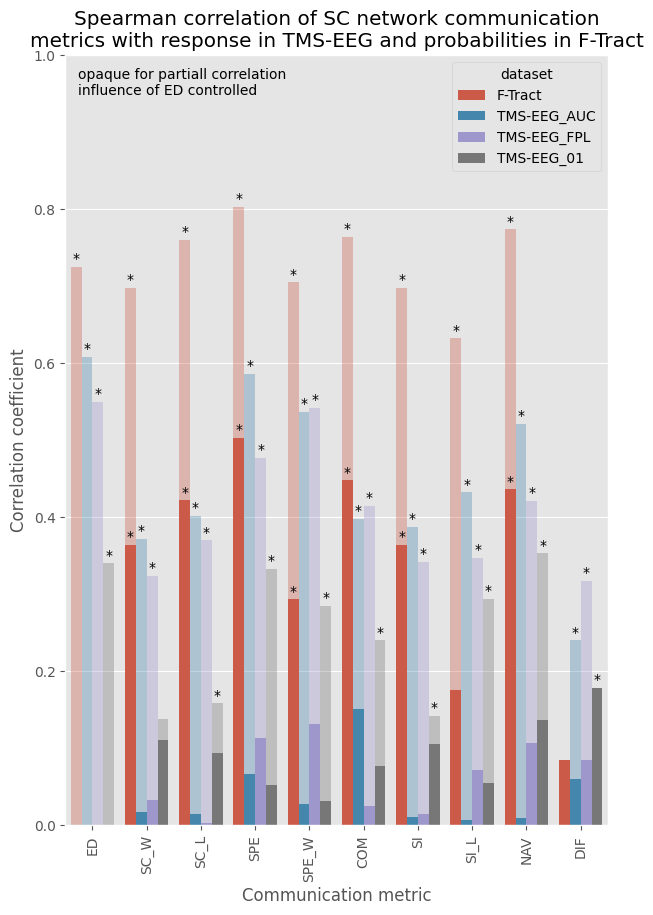

In [22]:
title = "Spearman correlation of SC network communication\nmetrics with response in TMS-EEG and probabilities in F-Tract"
plotting.plot_results_overlay(df_stat_all,df_stat_all_partial,title=title,fig_dir=fig_dir)